# Preparación de datos

In [1]:
import Datos

dataset_heart = Datos.Datos('Datasets/heart.csv')
dataset_wdbc = Datos.Datos('Datasets/wdbc.csv')
dataset_iris = Datos.Datos('Datasets/iris.csv')

dataset_heart_norm = Datos.Datos('Datasets/heart.csv')
dataset_wdbc_norm = Datos.Datos('Datasets/wdbc.csv')
dataset_iris_norm = Datos.Datos('Datasets/iris.csv')

heart_data = dataset_heart.datos
wdbc_data = dataset_wdbc.datos
iris_data = dataset_iris.datos

dataset_heart_norm.datos, _, _ = Datos.estandarizarDatos(dataset_heart_norm.datos, dataset_heart_norm.nominalAtributos, dataset_heart_norm.diccionarios)
dataset_wdbc_norm.datos, _, _ = Datos.estandarizarDatos(dataset_wdbc_norm.datos, dataset_wdbc_norm.nominalAtributos, dataset_wdbc_norm.diccionarios)
dataset_iris_norm.datos, _, _ = Datos.estandarizarDatos(dataset_iris_norm.datos, dataset_iris_norm.nominalAtributos, dataset_iris_norm.diccionarios)

heart_data_norm = dataset_heart_norm.datos
wdbc_data_norm = dataset_wdbc_norm.datos
iris_data_norm = dataset_iris_norm.datos

# Apartado 1 
Resultados de la clasificación mediante regresión logística
en los conjuntos de datos heart y wdbc. Probar con dos o
tres valores para la constante de aprendizaje y el número
de pasos.

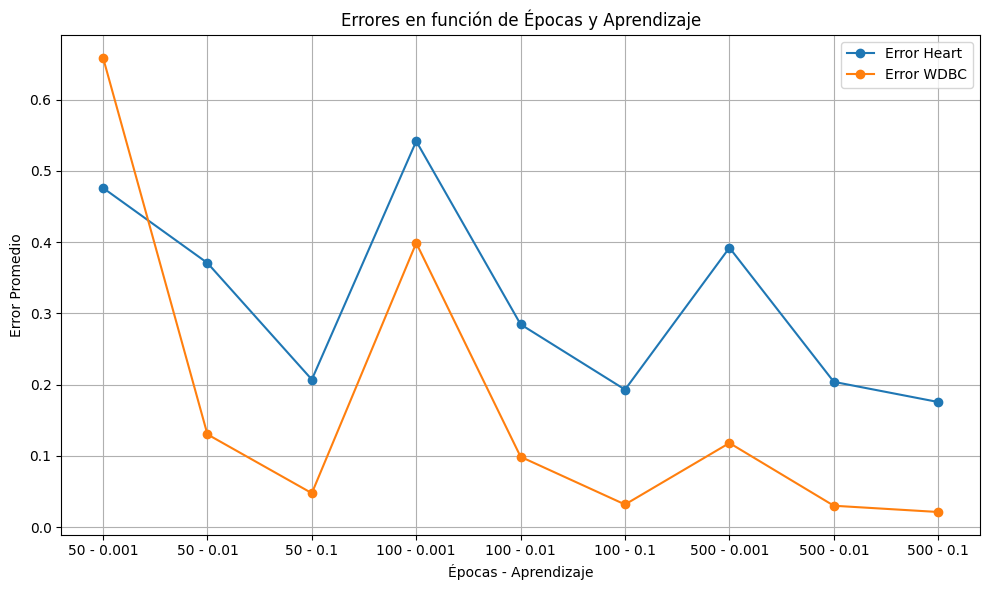

In [2]:
import numpy as np
import warnings
from Clasificador import Clasificador, ClasificadorRegresionLogistica
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=RuntimeWarning)

clasificador = Clasificador() 

error_heart = []
error_wdbc = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl = ClasificadorRegresionLogistica(epocas=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart.append(np.mean(clasificador.validacion(validacion_cruzada, dataset_heart_norm, rl)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc.append(np.mean(clasificador.validacion(validacion_cruzada, dataset_wdbc_norm, rl)))

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart, label="Error Heart", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Apartado 2
Resultados de la clasificación utilizando los algoritmos de
Scikit-Learn para regresión logística. Comparación con los
resultados de la implementación propia. En los resultados
utilizar los mismos valores de constante de aprendizaje y
pasos que en la implementación propia.

/home/santacg/Code/Venvs/FAA_venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


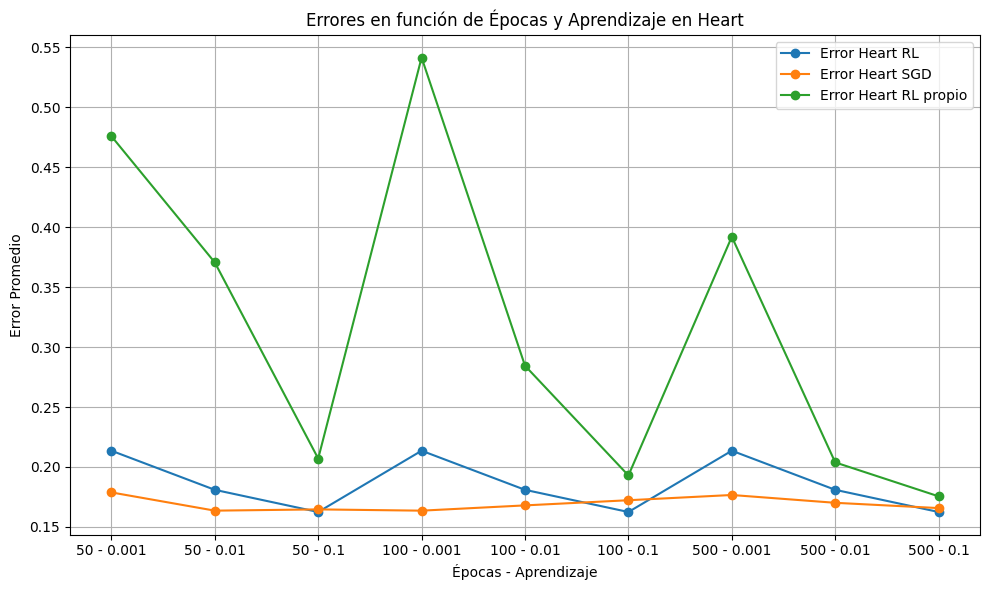

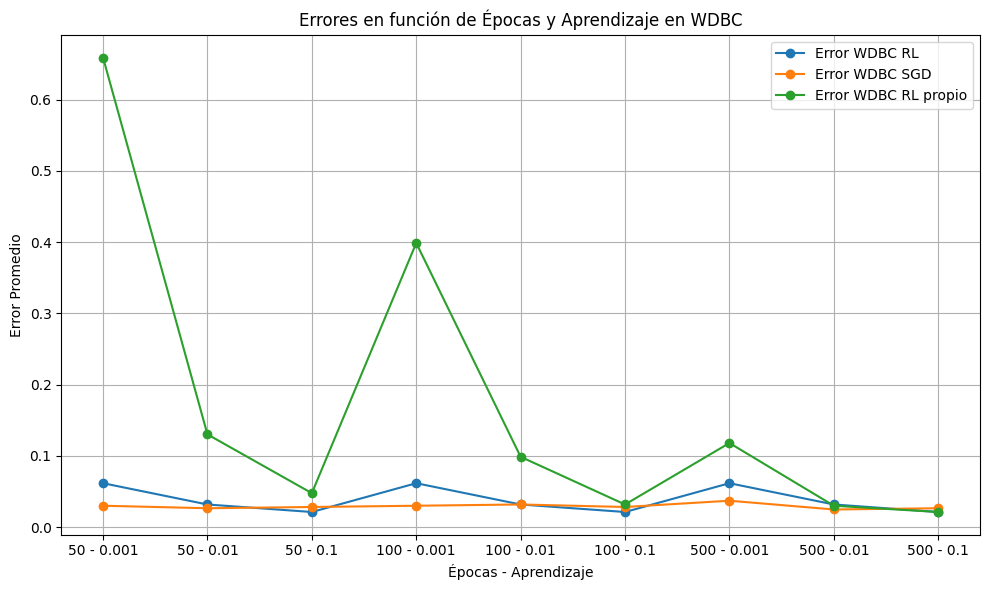

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Clasificador import Clasificador, ClasificadorRegresionLogisticaSK, ClasificadorSGD
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada

error_heart_logsk = []
error_wdbc_logsk = []
error_heart_sgdsk = []
error_wdbc_sgdsk = []

epocas = [50, 100, 500]
aprendizajes = [0.001, 0.01, 0.1]

for epoca in epocas:
    for aprendizaje in aprendizajes: 
        rl_sk = ClasificadorRegresionLogisticaSK(maxiter=epoca, aprendizaje=aprendizaje)
        sgd_sk = ClasificadorSGD(maxiter=epoca, aprendizaje=aprendizaje)
        validacion_cruzada = ValidacionCruzada()
        error_heart_sgdsk.append(np.mean(clasificador.validacion(validacion_cruzada, dataset_heart_norm, sgd_sk)))
        error_heart_logsk.append(np.mean(clasificador.validacion(validacion_cruzada, dataset_heart_norm, rl_sk)))
        validacion_cruzada = ValidacionCruzada()
        error_wdbc_sgdsk.append(np.mean(clasificador.validacion(validacion_cruzada, dataset_wdbc_norm, sgd_sk)))
        error_wdbc_logsk.append(np.mean(clasificador.validacion(validacion_cruzada, dataset_wdbc_norm, rl_sk)))

labels = [f"{epoca} - {aprendizaje}" for epoca in epocas for aprendizaje in aprendizajes]

plt.figure(figsize=(10, 6))
plt.plot(labels, error_heart_logsk, label="Error Heart RL", marker='o')
plt.plot(labels, error_heart_sgdsk, label="Error Heart SGD", marker='o')
plt.plot(labels, error_heart, label="Error Heart RL propio", marker='o')

plt.title("Errores en función de Épocas y Aprendizaje en Heart")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(labels, error_wdbc_logsk, label="Error WDBC RL", marker='o')
plt.plot(labels, error_wdbc_sgdsk, label="Error WDBC SGD", marker='o')
plt.plot(labels, error_wdbc, label="Error WDBC RL propio", marker='o')
plt.title("Errores en función de Épocas y Aprendizaje en WDBC")
plt.xlabel("Épocas - Aprendizaje")
plt.ylabel("Error Promedio")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Apartado 4
Análisis descrito en la sección de Tareas para el algoritmo de
clustering K-means, es decir:

• Para K=3, comprobar si se puede asignar de forma unívoca cada
clúster a un tipo de flor atendiendo a la clase mayoritaria de los
patrones agrupados por clúster

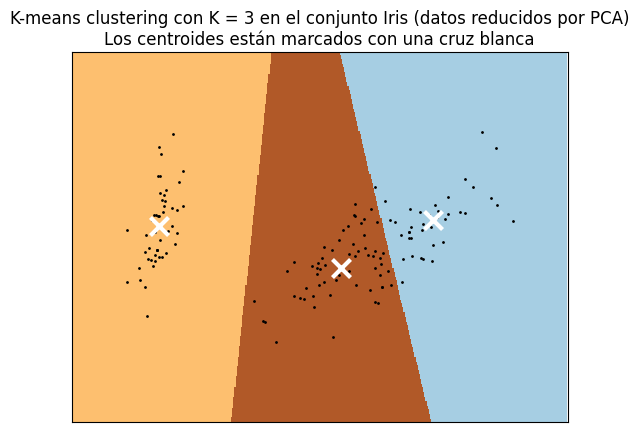

In [4]:
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X = iris_data.drop(columns='Class').values
y = iris_data['Class'].values

kmeans = ClusteringKMeans(3)
centroides, asignaciones = kmeans.kmeans(iris_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
centroides_reducidos = pca.transform(centroides)

h = 0.02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

grid_data = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid_data)

distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
Z = np.argmin(distancias_grid, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect='auto',
    origin='lower'
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

plt.scatter(
    centroides_reducidos[:, 0],
    centroides_reducidos[:, 1],
    marker='x',
    s=169,
    linewidths=3,
    color='w',
    zorder=10
)

plt.title(
    f"K-means clustering con K = {3} en el conjunto Iris (datos reducidos por PCA)\n"
    "Los centroides están marcados con una cruz blanca"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


• Analizar qué tipos de flor se identifican más fácilmente (con menos
errores), cuales más difícilmente (con más errores), y cuales se
confunden entre ellos. Para ello se puede hacer uso de la matriz de
confusión multiclase a partir del número de puntos en cada clase y
sabiendo que hay 50 ejemplos de cada tipo de flor.

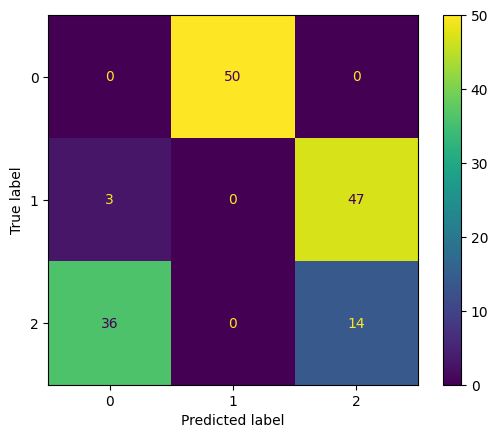

In [5]:
matriz_confusion = confusion_matrix(y, asignaciones)
disp = ConfusionMatrixDisplay(matriz_confusion)
disp.plot()
plt.show()

• Probar con otros valores de K = [2,4,5] y comparar los resultados con
los obtenidos para k=3. ¿Cuál sería el mejor K para este problema?

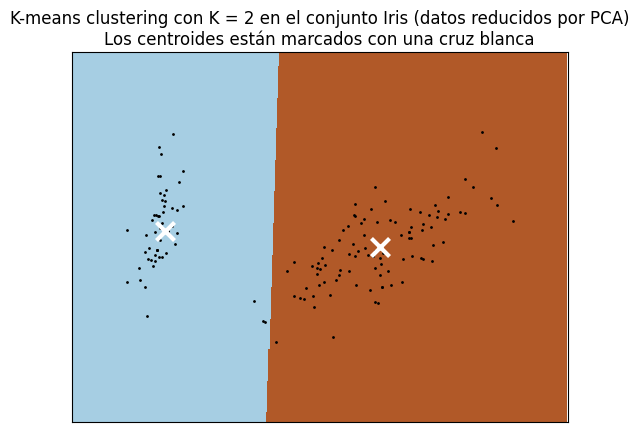

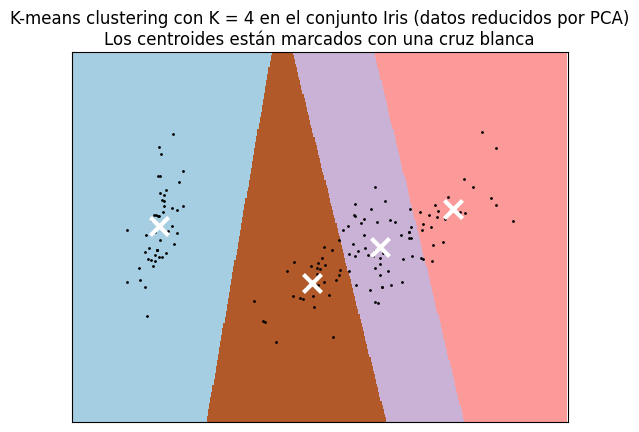

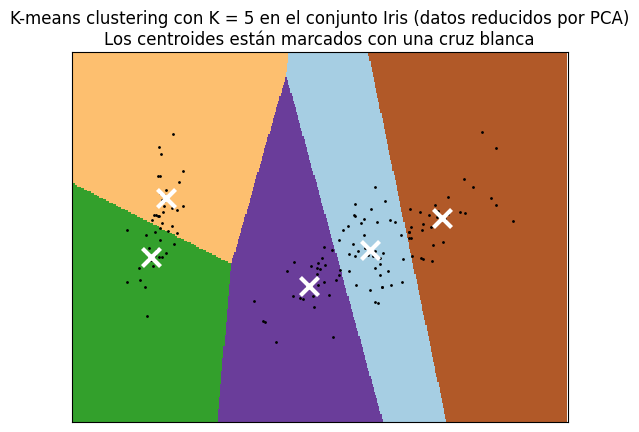

In [6]:
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

k_values = [2,4,5]

for k in k_values:
    
    X = iris_data.drop(columns='Class').values
    y = iris_data['Class'].values
    
    kmeans = ClusteringKMeans(k)
    centroides, asignaciones = kmeans.kmeans(iris_data)
    
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    centroides_reducidos = pca.transform(centroides)
    
    h = 0.02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid_data)
    
    distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
    Z = np.argmin(distancias_grid, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect='auto',
        origin='lower'
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    
    plt.scatter(
        centroides_reducidos[:, 0],
        centroides_reducidos[:, 1],
        marker='x',
        s=169,
        linewidths=3,
        color='w',
        zorder=10
    )
    
    plt.title(
        f"K-means clustering con K = {k} en el conjunto Iris (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()



• Analizar si se obtendrían otros resultados
normalizando los datos

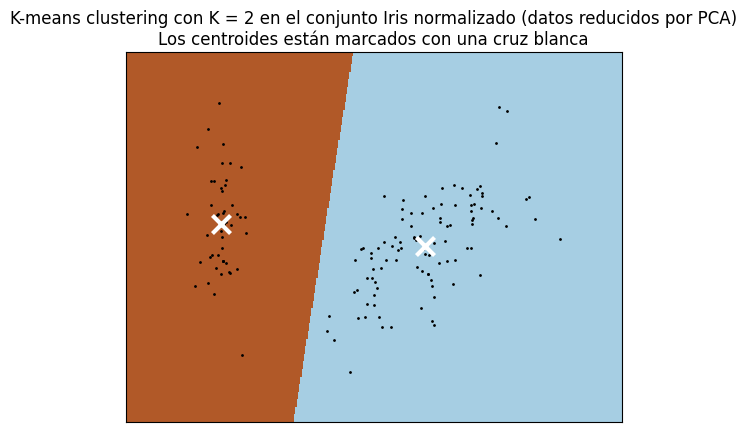

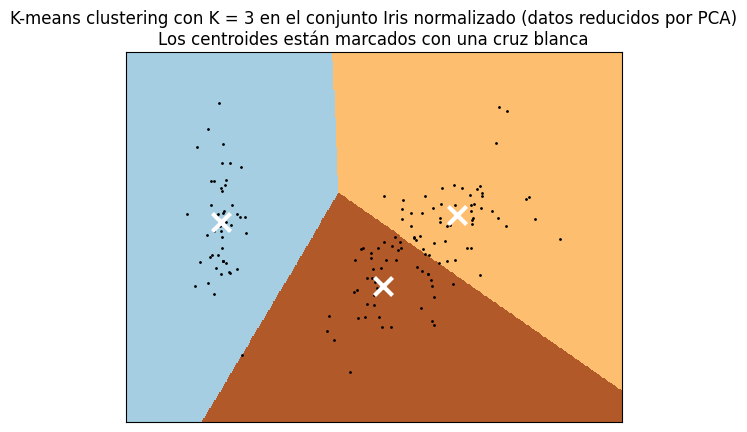

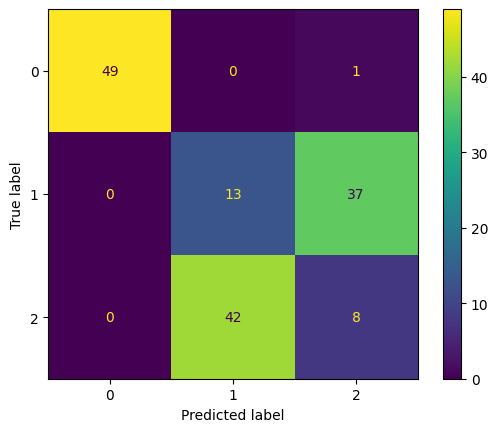

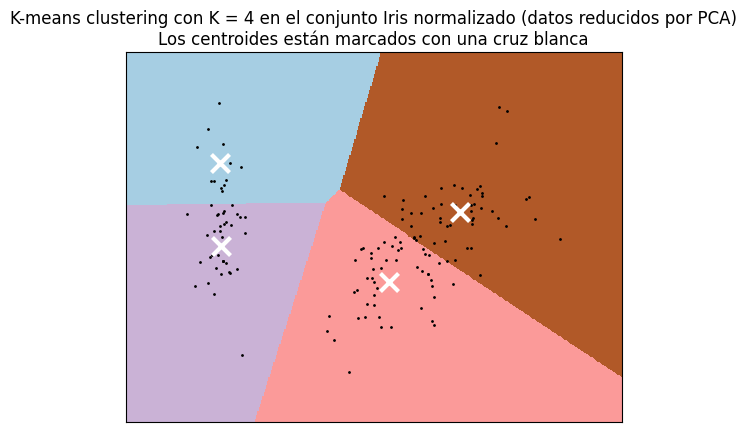

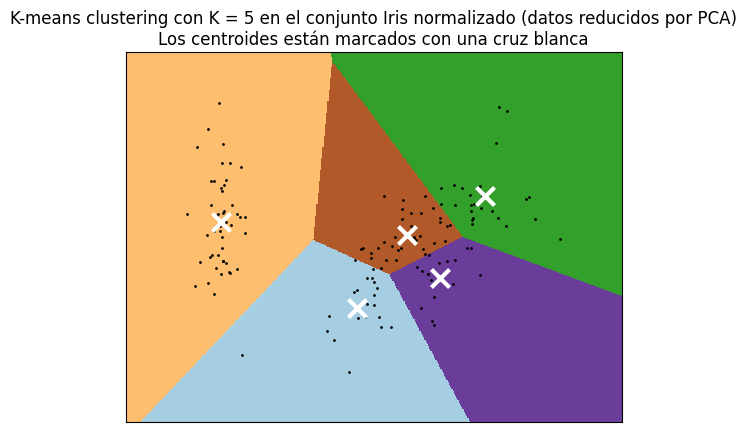

In [7]:
from ClusteringKMeans import ClusteringKMeans
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

k_values = [2,3,4,5]

for k in k_values:
    
    X = iris_data_norm.drop(columns='Class').values
    y = iris_data_norm['Class'].values
    
    kmeans = ClusteringKMeans(k)
    centroides, asignaciones = kmeans.kmeans(iris_data_norm)
    
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    centroides_reducidos = pca.transform(centroides)
    
    h = 0.02
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_original = pca.inverse_transform(grid_data)
    
    distancias_grid = np.linalg.norm(grid_original[:, np.newaxis] - centroides, axis=2)
    Z = np.argmin(distancias_grid, axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect='auto',
        origin='lower'
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    
    plt.scatter(
        centroides_reducidos[:, 0],
        centroides_reducidos[:, 1],
        marker='x',
        s=169,
        linewidths=3,
        color='w',
        zorder=10
    )
    
    plt.title(
        f"K-means clustering con K = {k} en el conjunto Iris normalizado (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        matriz_confusion = confusion_matrix(y, asignaciones)
        disp = ConfusionMatrixDisplay(matriz_confusion)
        disp.plot()
        plt.show()

# Apartado 5
Repetir el análisis de K-means con la librería Kmeans de
Scikit-learn y comparar los resultados con la
implementación propia

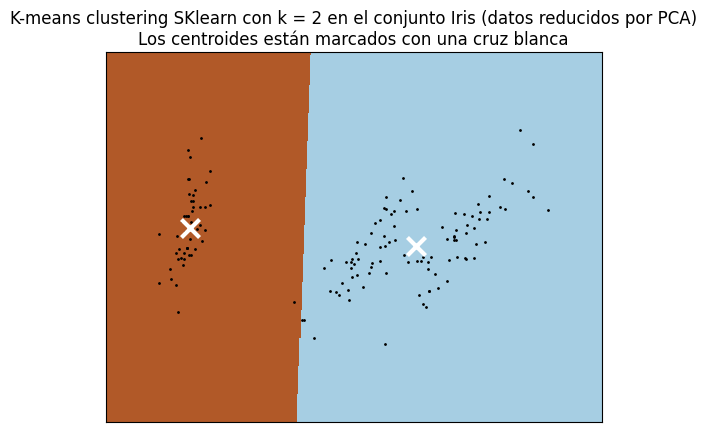

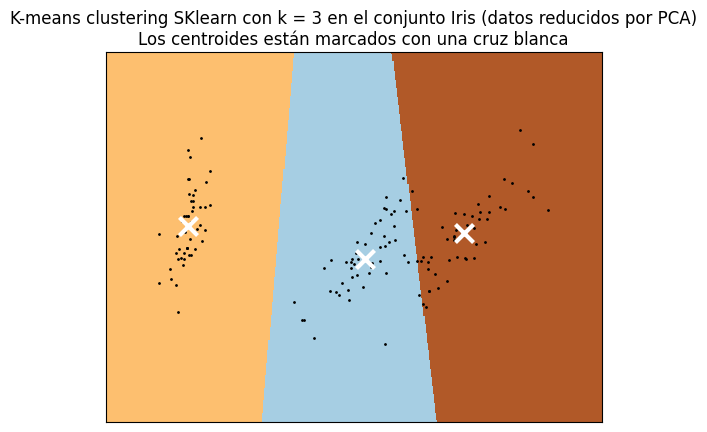

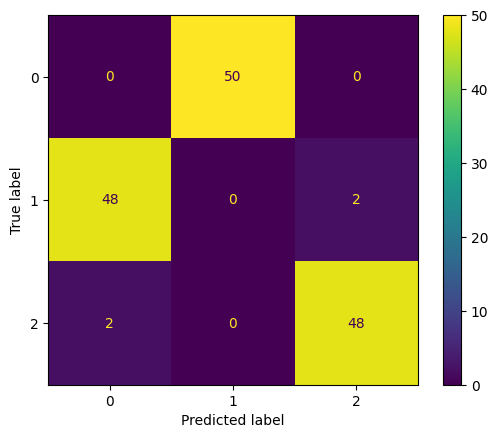

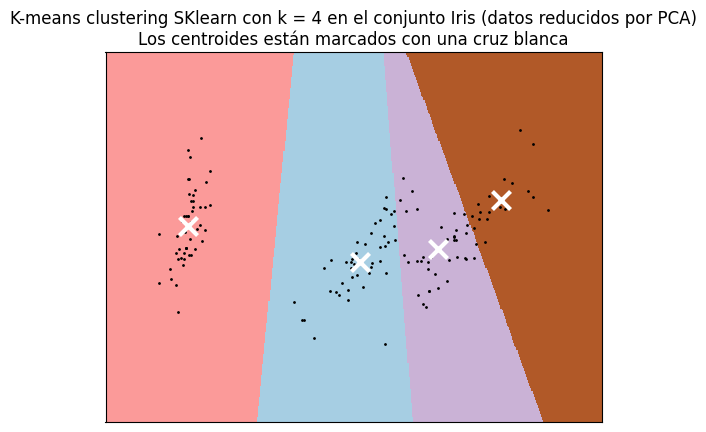

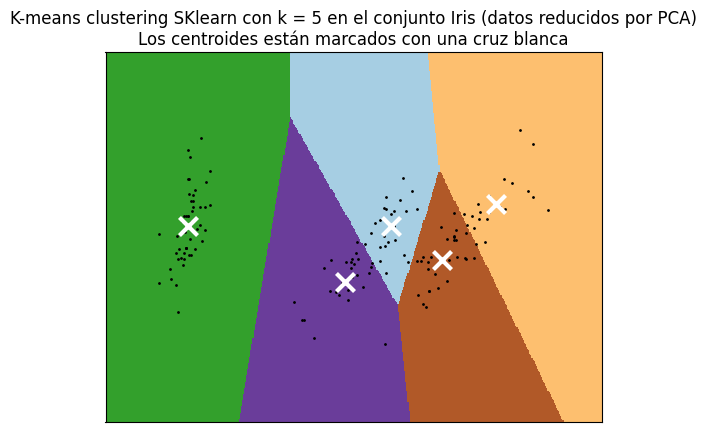

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

k_values =[2,3,4,5]

for k in k_values:
    reduced_data = PCA(n_components=2).fit_transform(iris_data)
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(reduced_data)
    
    h = 0.02 
    
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means clustering SKlearn con k = {k} en el conjunto Iris (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        disp = ConfusionMatrixDisplay.from_predictions(iris_data['Class'], kmeans.labels_)
        disp.plot()


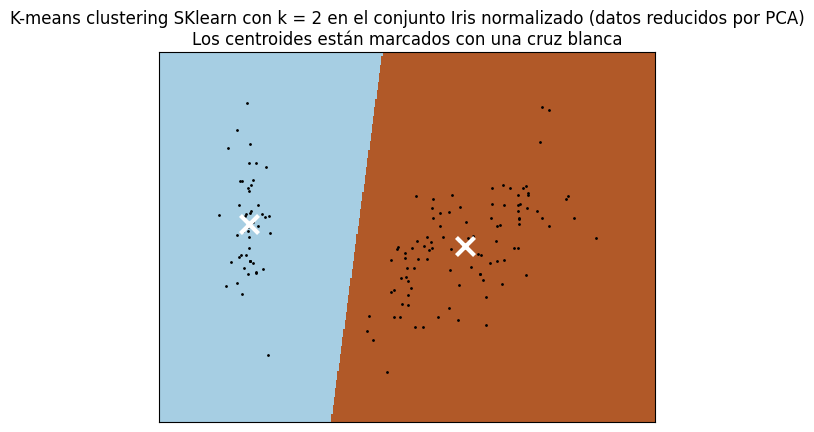

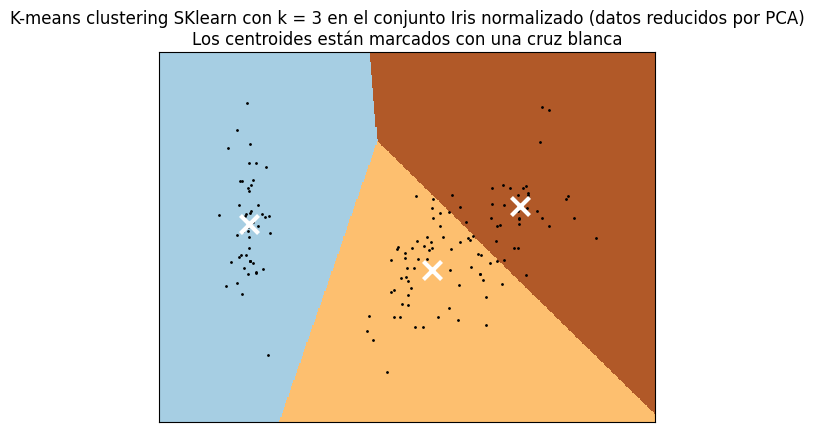

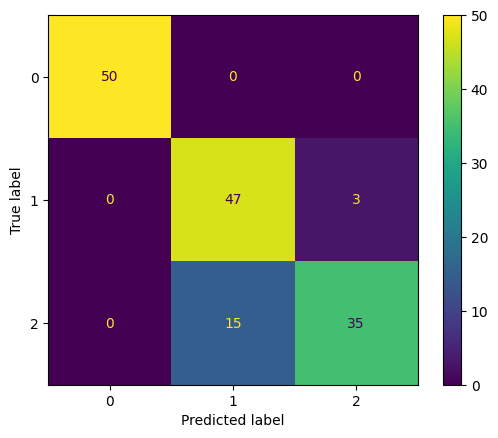

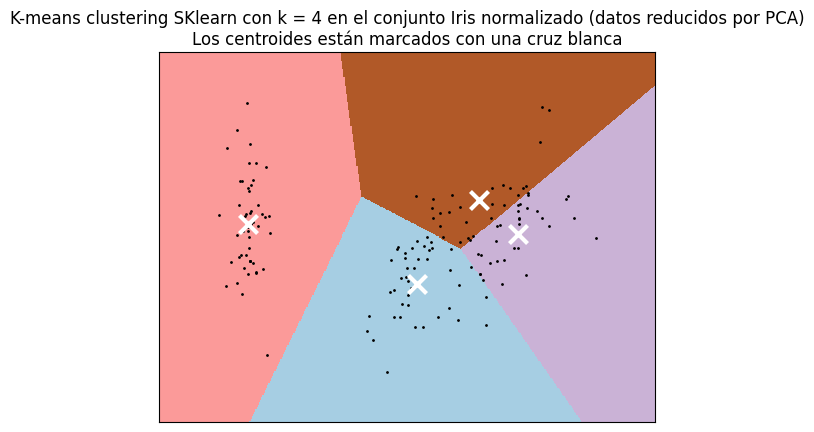

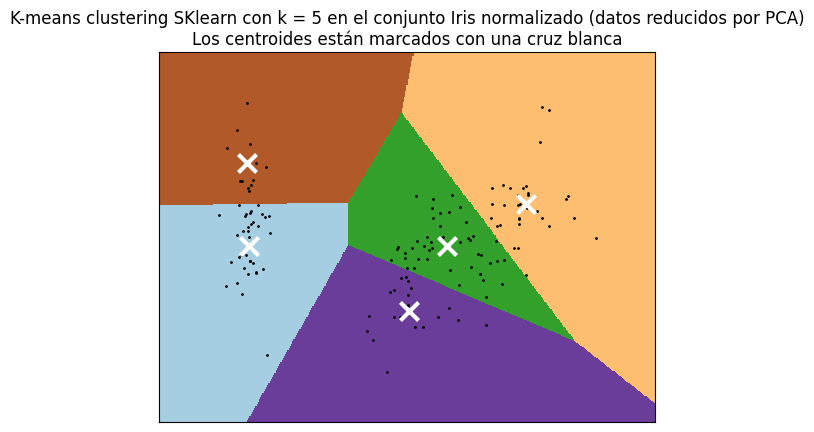

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

k_values =[2,3,4,5]

for k in k_values:
    reduced_data = PCA(n_components=2).fit_transform(iris_data_norm)
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(reduced_data)
    
    h = 0.02 
    
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )
    
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        f"K-means clustering SKlearn con k = {k} en el conjunto Iris normalizado (datos reducidos por PCA)\n"
        "Los centroides están marcados con una cruz blanca"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

    if k == 3:
        disp = ConfusionMatrixDisplay.from_predictions(iris_data_norm['Class'], kmeans.labels_)
        disp.plot()
